In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2, os

from sklearn.cluster import KMeans
import easyocr

In [2]:
!which python

/home/suetin/Projects/VSCode/ExciseProject/.venv/bin/python


In [3]:
# %cd drive/MyDrive/ColabNotebooks/ExciseOCR/
%cd ..

/home/suetin/Projects/VSCode/ExciseProject/ExciseOCR


/home/suetin/Projects/VSCode/ExciseProject/.venv/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [4]:
reader = easyocr.Reader(['ru']) # this needs to run only once to load the model into memory
# result = reader.readtext('data/splits/mark_0-0.jpg')  # /content/drive/MyDrive/ColabNotebooks/ExciseOCR/data/splits/mark_0-0.jpg
# result

/home/suetin/Projects/VSCode/ExciseProject/.venv/lib/python3.10/site-packages/torch/cuda/__init__.py:118: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:108.)
  return torch._C._cuda_getDeviceCount() > 0
Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


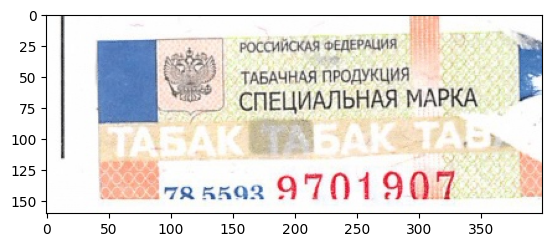

In [5]:
img = cv2.imread('data/splits/mark_0-0.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
plt.imshow(cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE));

In [6]:
series_mask = cv2.inRange(np.float32(hsv),
    lowerb=np.array([105, 50, 0]),
    upperb=np.array([115, 360, 360])
)
number_mask = cv2.inRange(np.float32(hsv),
    lowerb=np.array([170, 50, 0]),
    upperb=np.array([180, 360, 360])
)
number_mask[:5, :5], series_mask[:5, :5]

(array([[0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0]], dtype=uint8),
 array([[0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0]], dtype=uint8))

In [7]:
number_mask.shape, series_mask.shape

((400, 160), (400, 160))

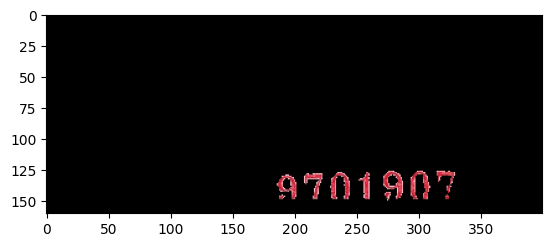

In [8]:
output = cv2.bitwise_and(hsv, hsv, mask=number_mask)
output = cv2.cvtColor(output, cv2.COLOR_HSV2RGB)
output = cv2.rotate(output, cv2.ROTATE_90_COUNTERCLOCKWISE)

plt.imshow(output);

In [9]:
reader.readtext(output)

[([[np.int32(181), np.int32(121)],
   [np.int32(337), np.int32(121)],
   [np.int32(337), np.int32(157)],
   [np.int32(181), np.int32(157)]],
  '9711 97',
  np.float64(0.6029537137963425))]

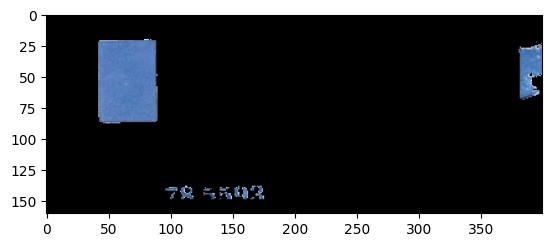

In [10]:
output = cv2.bitwise_and(hsv, hsv, mask=series_mask)
output = cv2.cvtColor(output, cv2.COLOR_HSV2RGB)
output = cv2.rotate(output, cv2.ROTATE_90_COUNTERCLOCKWISE)

plt.imshow(output);

In [11]:
reader.readtext(output)

[([[np.int32(95), np.int32(134)],
   [np.int32(179), np.int32(134)],
   [np.int32(179), np.int32(154)],
   [np.int32(95), np.int32(154)]],
  '7а =4ш',
  np.float64(0.3747513633490147))]

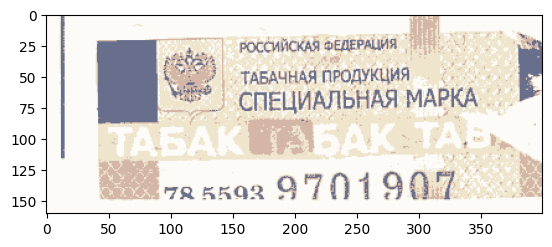

In [53]:
from sklearn.cluster import KMeans


n_classes = 4
model = KMeans(n_clusters=n_classes)

model.fit(img.reshape(-1, 3))

new_img = img.copy().reshape((-1, 3))

for i in range(n_classes):
    indxs = np.where(model.labels_ == i)
    new_img[indxs] = model.cluster_centers_[i]

new_img = new_img.reshape(img.shape)
new_img = cv2.rotate(new_img, cv2.ROTATE_90_COUNTERCLOCKWISE)

plt.imshow(new_img)

In [54]:
%%time
# Get result of predictions
res = reader.readtext(new_img)
res[5:]

CPU times: user 1.9 s, sys: 39.6 ms, total: 1.94 s
Wall time: 323 ms


[([[np.int32(175), np.int32(81)],
   [np.int32(365), np.int32(81)],
   [np.int32(365), np.int32(121)],
   [np.int32(175), np.int32(121)]],
  'ЮАХ:4а',
  np.float64(0.08400332298696818)),
 ([[np.int32(93), np.int32(133)],
   [np.int32(179), np.int32(133)],
   [np.int32(179), np.int32(153)],
   [np.int32(93), np.int32(153)]],
  '78 5а?',
  np.float64(0.249734221777114)),
 ([[np.int32(181), np.int32(121)],
   [np.int32(337), np.int32(121)],
   [np.int32(337), np.int32(157)],
   [np.int32(181), np.int32(157)]],
  '9701907',
  np.float64(0.9983062542257221))]

## Load data

1. Load full image                    # First circle
2. Split into peaces 5x10             # Second circle
3. Prepare the image for model        # For every image, where image is a small pieces (1 excise)
- 3.1. Crop upper part of image         # Use hsv color mask and then use argmax
- 3.2. MAY BE reshape image to more size # SOMNIIIITELNOO
4. Apply model                        # Get model predict 
5. Postrocces text output             # We also have a text here*
6. Get: probability and results of detection


*try remove it. First idea is get in 3.1 Remove text from image. Delete it in the future


LOGO_DETECTION 640 x 480

LABEL_DETECTION 640 x 480

TEXT_DETECTION and DOCUMENT_TEXT_DETECTION 1024 x 768 OCR requires more resolution to detect characters

In [55]:
def load_image(path:str):
    assert type(path) == str
    assert os.path.exists(path)

    img = cv2.imread(path)
    assert img is not None
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

(400, 160, 3)


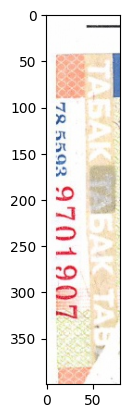

In [56]:
print(img.shape)
plt.imshow(img[:, 0:80])

In [57]:
from src.scripts.utils import segmenting_image, prepare_image

In [141]:
X = cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE)
X = X[80:, :, :]
x = X.reshape((-1, 3))

# Init and fit model
n_classes = 3
model = KMeans(n_clusters=n_classes)
model.fit(x)


KMeans(n_clusters=3)

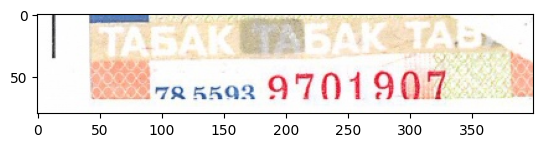

In [111]:
plt.imshow(X)

In [112]:
def postpocess(numbers_result):
    return numbers_result

len(res)

2

In [186]:
nRows = 5  # 5
mCols = 10  # 10 # Number of columns
# data/digits3_0.png
top_margin = 150
left_margin = 5
mark_width = 160
mark_height = 400

#
data_paths = ['data/digits3_0.png']#, 'aaaa']

for data_path in data_paths:
    print(data_path)
    # 1. Load full image
    full_image = load_image(data_path)
    print(full_image.shape)
    # 2. Split to 5x10
    for i in range(0, nRows):
        for j in range(0, mCols):
            h1 = int(i*mark_height) + top_margin
            h2 = int(i*mark_height + mark_height) + top_margin
            w1 = int(j*mark_width) + left_margin
            w2 = int(j*mark_width + mark_width) + left_margin
            roi = full_image[h1:h2, w1:w2]

            # 3. Preparation image before model
            # Rotate to 90 degrees
            roi = cv2.rotate(roi, cv2.ROTATE_90_COUNTERCLOCKWISE)  # (160, 400)
            # KMeans
            seg_img = segmenting_image(model, roi[80:, :, :])
            print(f"segmentation shape: {seg_img.shape}")
            # Choose y min index and Crop image
            # new_img = prepare_image(seg_img)
            # print(f"prepared shape: {new_img.shape}")
            # Resize
            # res_img = cv2.resize(new_img, (480, 640), interpolation=cv2.INTER_LANCZOS4)
            # print("After resize", res_img.shape)

            # display(plt.imshow(seg_img))

            # 4. Get result of predictions
            res = reader.readtext(seg_img)
            # 5. Postrocces text output             # We also have a text here*
            res = res[-4:]
            # bboxs, numbers, probabilities = postpocess(res)
            # 6. Get: probability and results of detection
            print(len(res))
            print(res)

data/digits3_0.png
(2339, 1654, 3)
(80, 400, 3)
segmentation shape: (80, 400, 3)
4
[([[np.int32(49), np.int32(5)], [np.int32(165), np.int32(5)], [np.int32(165), np.int32(41)], [np.int32(49), np.int32(41)]], 'ПЕ', np.float64(0.3136518134462331)), ([[np.int32(213), 0], [np.int32(365), 0], [np.int32(365), np.int32(41)], [np.int32(213), np.int32(41)]], '( _е', np.float64(0.08700449303721879)), ([[np.int32(93), np.int32(53)], [np.int32(179), np.int32(53)], [np.int32(179), np.int32(73)], [np.int32(93), np.int32(73)]], '78 559?', np.float64(0.22677048117071485)), ([[np.int32(181), np.int32(41)], [np.int32(337), np.int32(41)], [np.int32(337), np.int32(77)], [np.int32(181), np.int32(77)]], '9701907', np.float64(0.9999629630262269))]
(80, 400, 3)
segmentation shape: (80, 400, 3)
4
[([[np.int32(84), 0], [np.int32(239), 0], [np.int32(239), np.int32(36)], [np.int32(84), np.int32(36)]], 'Еж шэ', np.float64(0.28478092317112547)), ([[np.int32(292), 0], [np.int32(366), 0], [np.int32(366), np.int32(26)]

In [114]:
# res[num_detections][positions(0), value(1), probabiliti(2)][values]

78 5593 0.9998946727279158
9752401 0.9564245724807597
РОСЕИЙСКАЯ ФЕДЕРАЦНЯ 0.7251034898560414


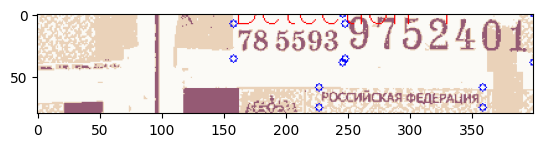

In [187]:
new_img = seg_img.copy()

for i in range(len(res)):
    coords, vals, prob = res[i]
    for x, y in coords:
        new_img = cv2.circle(new_img, (x, y), radius=3, color=(0, 0, 255), thickness=1)
    print(vals, prob)
cv2.putText(new_img, text="Detection 1", org=(res[0][0][0]), fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=1, color=(255, 0, 0), thickness=1)
cv2.putText(new_img, text="Detection 2", org=(res[1][0][0]), fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=1, color=(255, 0, 0), thickness=1)

plt.imshow(new_img);

In [188]:
res[i][2]

np.float64(0.7251034898560414)

[  0  15  24 120 167]


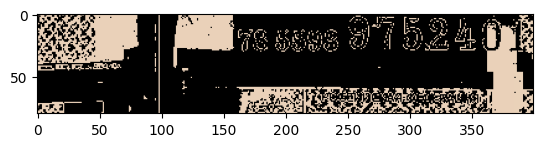

In [189]:
new_hsv = cv2.cvtColor(new_img, cv2.COLOR_RGB2HSV)

print(np.unique(new_hsv[:, :, 0]))

mask = cv2.inRange(np.float32(new_hsv),
    lowerb=np.array([15, 10, 0]),
    upperb=np.array([24, 360, 360])
)

output = cv2.bitwise_and(new_hsv, new_hsv, mask=mask)
output = cv2.cvtColor(output, cv2.COLOR_HSV2RGB)

plt.imshow(output)

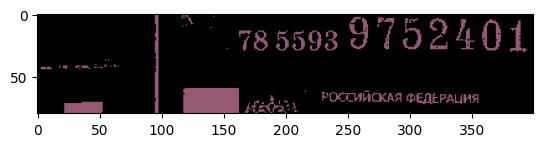

In [190]:
mask = cv2.inRange(np.float32(new_hsv),
    lowerb=np.array([121, 10, 0]),
    upperb=np.array([167, 360, 360])
)

output = cv2.bitwise_and(new_hsv, new_hsv, mask=mask)
output = cv2.cvtColor(output, cv2.COLOR_HSV2RGB)

plt.imshow(output)

In [191]:
test_res = reader.readtext(output)
test_res, len(test_res)

([([[np.int32(157), 0],
    [400, 0],
    [400, np.int32(37)],
    [np.int32(157), np.int32(37)]],
   '78 5593 9752401',
   np.float64(0.9188331055014123)),
  ([[np.int32(227), np.int32(61)],
    [np.int32(359), np.int32(61)],
    [np.int32(359), np.int32(75)],
    [np.int32(227), np.int32(75)]],
   'РОСЕИЙаАЯ ФЕДЕРАЦНЯ',
   np.float64(0.5483617217735705))],
 2)

In [195]:
# res[num_detections][positions(0), value(1), probabiliti(2)][values]
values = []

for bb, val, prob in test_res:
    print(val)
    try:
        num = int(val)   # NUM
        values.append(num)
    except:
        try:
            num = None
            out = val.split(" ")  # Series or "series1 series2 num"
            print(out)
            if len(out) == 2:
                series = np.array(out[1], dtype=int)    # SERIES
            elif len(out) == 3:
                num, series = np.array(out[1:], dtype=int)
                print(num, series)
            else:
                print("UNKNOWN")
        except:
            print("ERROR")



78 5593 9752401
['78', '5593', '9752401']
5593 9752401
РОСЕИЙаАЯ ФЕДЕРАЦНЯ
['РОСЕИЙаАЯ', 'ФЕДЕРАЦНЯ']
ERROR


In [177]:
bb, v, p = detection
bb

[[np.int32(227), np.int32(61)],
 [np.int32(359), np.int32(61)],
 [np.int32(359), np.int32(75)],
 [np.int32(227), np.int32(75)]]